### Diabetes India prediction

In [42]:
import numpy as np 
import pandas as pd 
import keras
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
import joblib

In [43]:
df = pd.read_csv('./diabetes.csv')
units = {'BloodPressure':'(mm Hg)', 'SkinThickness':'(mm)', 'Insulin':'(mu U/ml)'}
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [44]:
df.isna().sum()     # No empty data

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [45]:
for col in df.columns:
    udata = df[col].unique()
    print(f"Col({col}) , dtype: {df[col].dtype} , Data like: {udata[:5]} , max: {udata.max()} , min: {udata.min()}")

Col(Pregnancies) , dtype: int64 , Data like: [6 1 8 0 5] , max: 17 , min: 0
Col(Glucose) , dtype: int64 , Data like: [148  85 183  89 137] , max: 199 , min: 0
Col(BloodPressure) , dtype: int64 , Data like: [72 66 64 40 74] , max: 122 , min: 0
Col(SkinThickness) , dtype: int64 , Data like: [35 29  0 23 32] , max: 99 , min: 0
Col(Insulin) , dtype: int64 , Data like: [  0  94 168  88 543] , max: 846 , min: 0
Col(BMI) , dtype: float64 , Data like: [33.6 26.6 23.3 28.1 43.1] , max: 67.1 , min: 0.0
Col(DiabetesPedigreeFunction) , dtype: float64 , Data like: [0.627 0.351 0.672 0.167 2.288] , max: 2.42 , min: 0.078
Col(Age) , dtype: int64 , Data like: [50 31 32 21 33] , max: 81 , min: 21
Col(Outcome) , dtype: int64 , Data like: [1 0] , max: 1 , min: 0


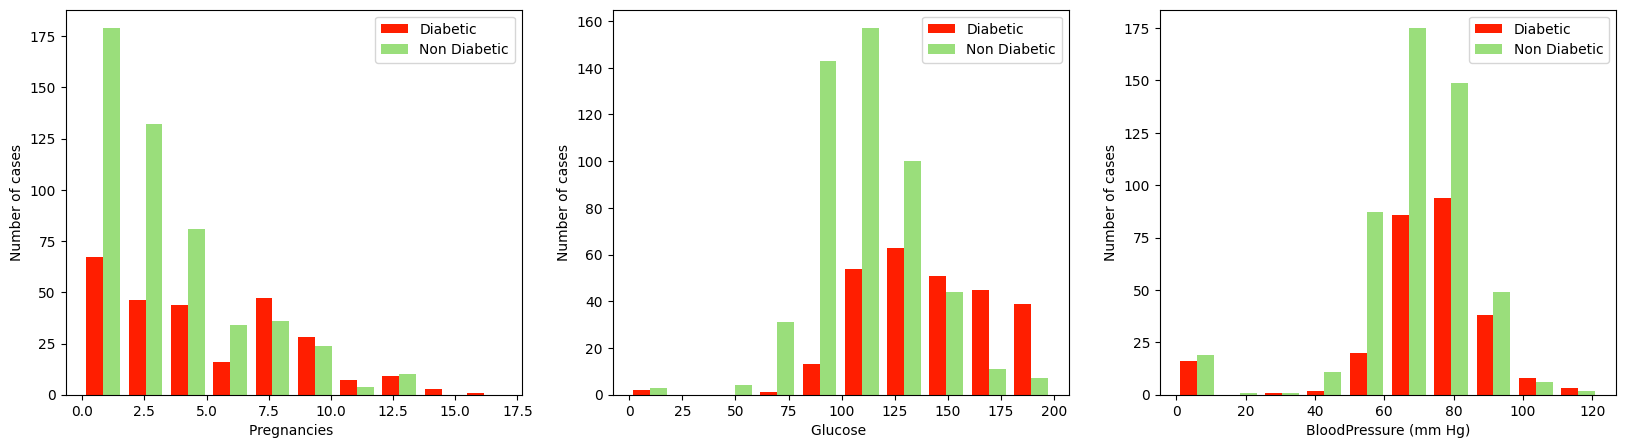

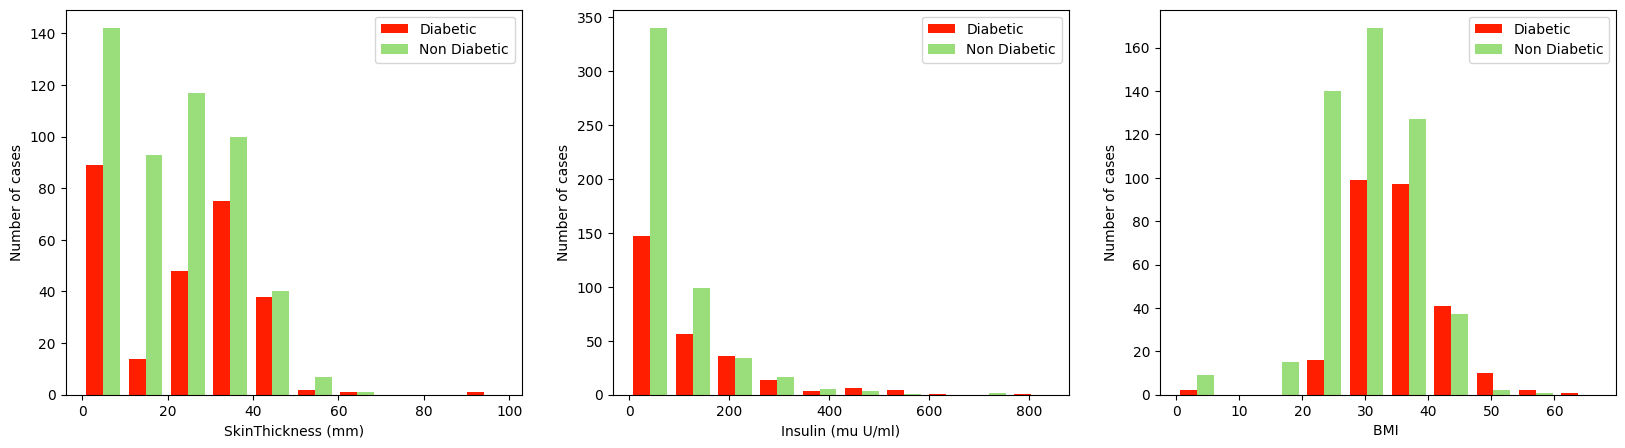

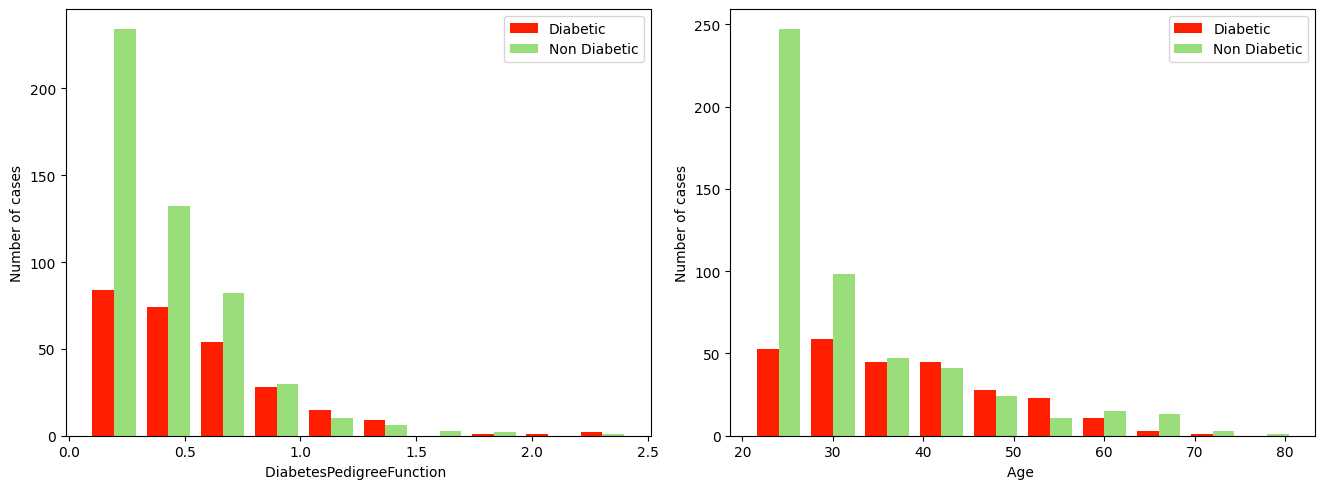

In [46]:
diabetic = df[df.Outcome==1].drop('Outcome',axis='columns')
nonDiabetic = df[df.Outcome==0].drop('Outcome',axis='columns')
i = 1
for i,col in enumerate(diabetic.columns):
    if (i%3==0):
        plt.figure(figsize=(20, 5))
    plt.subplot(1,3,i%3+1)
    plt.hist([diabetic[col],nonDiabetic[col]],color=['#FF1E00','#9ADE7B'],label=['Diabetic','Non Diabetic'])
    plt.xlabel(f"{col} {units.get(col,'')}")
    plt.ylabel(f"Number of cases")
    plt.legend()
    
plt.tight_layout()
plt.show()

### Lets scale the data

In [47]:
X = df.drop('Outcome',axis='columns')
y = df['Outcome']

In [48]:
X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [49]:
Scaler = StandardScaler() 
Scaler.fit(X)
joblib.dump(Scaler,'StandardScaler.joblib')

['StandardScaler.joblib']

In [24]:
def scaleData(X):
    return Scaler.transform(X)

X[X.columns] = scaleData(X)
X.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584


In [25]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [26]:
model = keras.Sequential([
    keras.layers.Dense(8,input_shape=(8,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
model.fit(X_train,y_train,epochs=170)

Epoch 1/170


20/20 [==============================] - 1s 3ms/step - loss: 0.8492 - accuracy: 0.4609
Epoch 2/170
20/20 [==============================] - 0s 3ms/step - loss: 0.8072 - accuracy: 0.4853
Epoch 3/170
20/20 [==============================] - 0s 3ms/step - loss: 0.7711 - accuracy: 0.5244
Epoch 4/170
20/20 [==============================] - 0s 3ms/step - loss: 0.7395 - accuracy: 0.5521
Epoch 5/170
20/20 [==============================] - 0s 2ms/step - loss: 0.7113 - accuracy: 0.5831
Epoch 6/170
20/20 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.6156
Epoch 7/170
20/20 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.6368
Epoch 8/170
20/20 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.6694
Epoch 9/170
20/20 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.6808
Epoch 10/170
20/20 [==============================] - 0s 3ms/step - loss: 0.6058 - accuracy: 0.6954
Epoch 11/170
20/20 [=

In [28]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7338


[0.5199929475784302, 0.7337662577629089]

In [29]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [30]:
def Predict(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,BMI, DiabetesPedigreeFunction, Age):
    dummyDF = pd.DataFrame({'Pregnancies':[Pregnancies], 'Glucose':[Glucose], 'BloodPressure':[BloodPressure],
                         'SkinThickness':[SkinThickness], 'Insulin':[Insulin], 'BMI':[BMI], 
                            'DiabetesPedigreeFunction':[ DiabetesPedigreeFunction], 'Age':[Age]})
    
    pred_y = model.predict(scaleData(dummyDF))[0][0]
    diabetic = True if pred_y >= 0.5 else False
    dpercent = round(pred_y*100,2)
    print(f"Patient {'maybe' if diabetic else 'may not be'} diabetic , chances = {dpercent}%")
    

Predict(2,140,80,40,0,33,0.6,42)

1/1 [==============================] - 0s 57ms/step
Patient maybe diabetic , chances = 50.68%


In [31]:
model.save('Diabetes_model.keras')